<a href="https://colab.research.google.com/github/hanggao811/Gravitational-Wave/blob/main/Bilby_waveform_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

practice waveform generation with following Argyro's github
https://github.com/asasli/gw-intro-umn/blob/main/BBH-Bilby_plus_injection.ipynb

In [8]:
!pip install bilby[gw]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 72.5 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp311-cp311-linux_x86_64.whl size=102031 sha256=2fdc206368a7f9c2ba5914eeb8a94c68e82ed1ff59e8c34d37c8e9fbf075963c
  Stored in directory: /root/.cache/pip/wheels/02/2b/93/c2ee2b6f4ea9572ee4f5ade0115c4bd0887be6228328740dae
Successfully built ligo-segments
  Attempting 

In [9]:
# Import Package

import numpy as np
import matplotlib.pyplot as plt
import bilby

In [10]:
#
duration = 4.0 #s?
sampling_frequency = 2048.0 #Hz
minimum_frequency = 20
bilby.core.utils.random.seed(42)

# Waveform model arguments
waveform_arg = dict(waveform_approximant = "IMRPhenomPv2",
                    reference_frequency = 50,
                    minimum_frequency = minimum_frequency)
waveform_generator = bilby.gw.WaveformGenerator(duration = duration,
                                                sampling_frequency = sampling_frequency,
                                                frequency_domain_source_model = bilby.gw.source.lal_binary_black_hole,
                                                parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
                                                waveform_arguments = waveform_arg)


18:46 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [11]:
# Set up interferometers
ifos = bilby.gw.detector.InterferometerList(["H1","L1"])

# Injection_parameters
injection_parameters = dict(mass_1 = 36.0,
                            mass_2 = 29.0,
                            a_1 = 0.4,
                            a_2 = 0.3,
                            tilt_1 = 0.5,
                            tilt_2 = 1.0,
                            phi_12 = 1.7,
                            phi_jl = 0.3,
                            luminosity_distance = 2000.0,
                            theta_jn = 0.4,
                            psi = 2.659,
                            phase = 1.3,
                            geocent_time = 1126259642.413,
                            ra = 1.375,
                            dec = 0.2108)

start_time = injection_parameters["geocent_time"] - 2 + duration #when does the merger start
#set noise model
ifos.set_strain_data_from_power_spectral_densities(sampling_frequency = sampling_frequency,
                                      duration = duration,
                                      start_time = start_time)
#inject signal
hphc =  ifos.inject_signal(waveform_generator = waveform_generator, parameters = injection_parameters)

/usr/local/lib/python3.11/dist-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
18:46 bilby WARNING : Injecting signal outside segment, start_time=1126259644.413, merger time=1126259642.413.
18:46 bilby INFO    : Injected signal in H1:
18:46 bilby INFO    :   optimal SNR = 10.00
18:46 bilby INFO    :   matched filter SNR = 8.92-0.47j
18:46 bilby INFO    :   mass_1 = 36.0
18:46 bilby INFO    :   mass_2 = 29.0
18:46 bilby IN

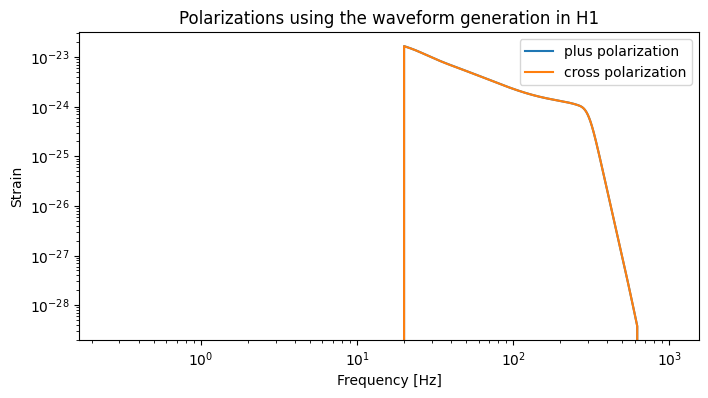

In [15]:
# Plot figures of hp,hc in H1
plt.figure(figsize=(8,4))
plt.loglog(ifos.frequency_array, abs(hphc[0]['plus']), label='plus polarization')
plt.loglog(ifos.frequency_array, abs(hphc[0]['cross']), label='cross polarization')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Strain')
plt.legend()
plt.title('Polarizations using the waveform generation in H1')
plt.show()

Text(0.5, 1.0, 'Detector response to incident GW in H1 and L1')

<Figure size 800x400 with 0 Axes>

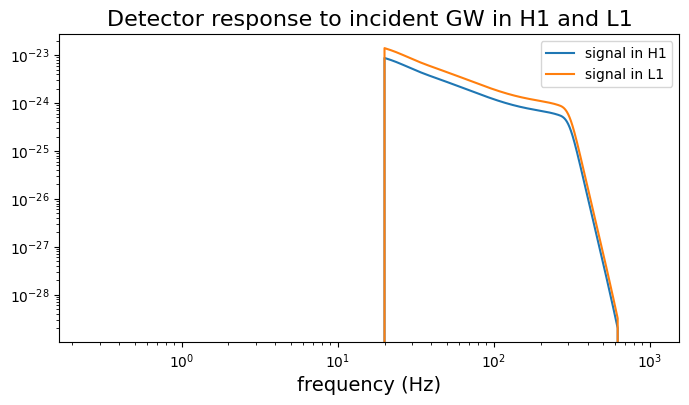

In [30]:
# Plot figures of hp in H1 and L1 that is the real response from the antenna
plt.figure(figsize=(8,4))
# Plot figures of hp,hc in H1
plt.figure(figsize=(8,4))
for ifo in ifos:
    name = ifo.name
    signal = ifo.get_detector_response(waveform_generator.frequency_domain_strain(), injection_parameters)
    plt.loglog(ifos.frequency_array,abs(signal),label = r'signal in {}'.format(str(name)))
plt.xlabel('frequency (Hz)', fontsize=14)
plt.legend(loc='best')
plt.title("Detector response to incident GW in H1 and L1", fontsize=16)

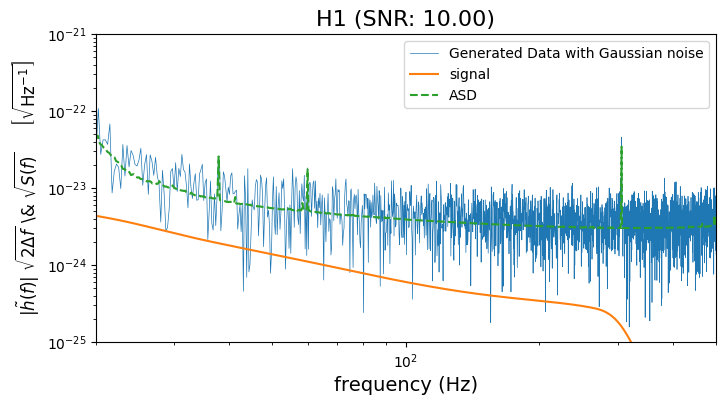

In [45]:
freq = ifos[0].frequency_array
plt.figure(figsize=(8,4))
ifo = 0
df = freq[1]-freq[0]
name = ifos[ifo].name
signal = ifos[ifo].get_detector_response(
        waveform_generator.frequency_domain_strain(), injection_parameters)
strain = abs(ifos[ifo].strain_data.frequency_domain_strain)
# Pure frequency-domain strain from the projected waveform
plt.loglog(freq, strain, label=r'Generated Data with Gaussian noise', lw=0.5)
# Full strain data includes injected signal and simulated Gaussian noise(from PSD)
plt.loglog(freq, np.sqrt(df)*abs(signal), label=r'signal')
# plot signal+noise
plt.loglog(ifos[ifo].power_spectral_density.frequency_array, np.sqrt(ifos[ifo].power_spectral_density.psd_array),
                 linestyle='dashed', label='ASD')
plt.xlabel('frequency (Hz)', fontsize=14)
plt.ylabel(r'$|\tilde{h}(f)|~\sqrt{2\Delta f}$ \& $\sqrt{S(f)}$ $\quad$ $\left[\sqrt{\rm{Hz^{-1}}}\right]$', fontsize=12)
plt.legend(loc='best')
plt.xlim(20,500);
plt.ylim(1e-25,1e-21);
plt.title("{} (SNR: {:.2f})".format(str(name),np.sqrt(ifos[ifo].optimal_snr_squared(signal=signal).real)), fontsize=16);

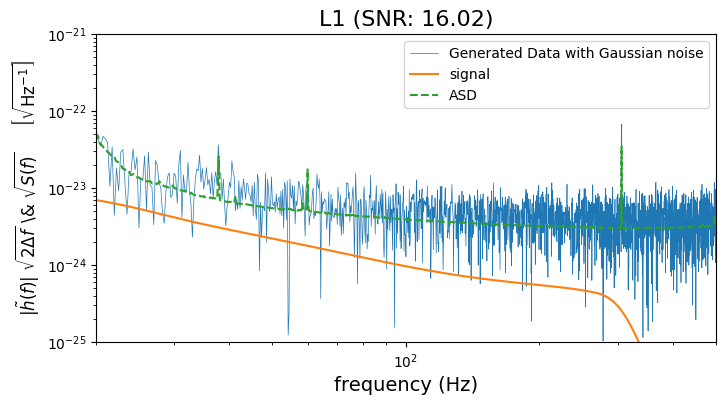

In [46]:
plt.figure(figsize=(8,4))
ifo = 1
df = freq[1]-freq[0]
name = ifos[ifo].name
signal = ifos[ifo].get_detector_response(
        waveform_generator.frequency_domain_strain(), injection_parameters)
strain = abs(ifos[ifo].strain_data.frequency_domain_strain)
plt.loglog(freq, strain, label=r'Generated Data with Gaussian noise', lw=0.5)
plt.loglog(freq, np.sqrt(df)*abs(signal), label=r'signal')
plt.loglog(ifos[ifo].power_spectral_density.frequency_array, np.sqrt(ifos[ifo].power_spectral_density.psd_array), linestyle='dashed', label='ASD')
plt.xlabel('frequency (Hz)', fontsize=14)
plt.ylabel(r'$|\tilde{h}(f)|~\sqrt{2\Delta f}$ \& $\sqrt{S(f)}$ $\quad$ $\left[\sqrt{\rm{Hz^{-1}}}\right]$', fontsize=12)
plt.legend(loc='best')
plt.xlim(20,500);
plt.ylim(1e-25,1e-21);
plt.title("{} (SNR: {:.2f})".format(str(name),np.sqrt(ifos[ifo].optimal_snr_squared(signal=signal).real)), fontsize=16);

#caveat:
**set_strain_data_from_power_spectral_densities()**:	Adds simulated noise to strain_data

**inject_signal(...)**: Adds the projected GW signal to that noise

**get_detector_response(...)**: Calculates what the signal would be, without touching noise

**ifos[ifo].strain_data.frequency_domain_strain**:	Full data = signal + noise (after injection)



In [50]:
#TIME DOMAIN
from bilby.gw.detector import strain_data
strain_class = strain_data.InterferometerStrainData()
strain_class.set_from_frequency_domain_strain(frequency_domain_strain = signal, sampling_frequency = sampling_frequency,duration=duration, start_time=start_time)

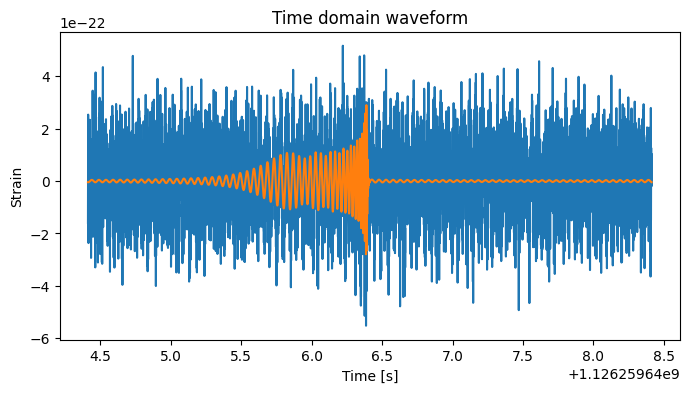

In [53]:
plt.figure(figsize=(8,4))
ifo = 1
df = freq[1]-freq[0]
name = ifos[ifo].name
times = ifos[ifo].strain_data.time_array
dt = ifos[ifo].strain_data.time_array[1]-ifos[ifo].strain_data.time_array[0]
strain_td = ifos[ifo].strain_data.time_domain_strain
signal_td = strain_class.time_domain_strain

plt.plot(times, strain_td, label="generated data")
plt.plot(times, signal_td, label="signal")
plt.xlabel('Time [s]')
plt.ylabel('Strain')
plt.title('Time domain waveform')
plt.show()

## Q-transform

/usr/local/lib/python3.11/dist-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 500.00 is too high for the given Q range, resetting to 471.32
  warnings.warn('upper frequency of %.2f is too high for the given '


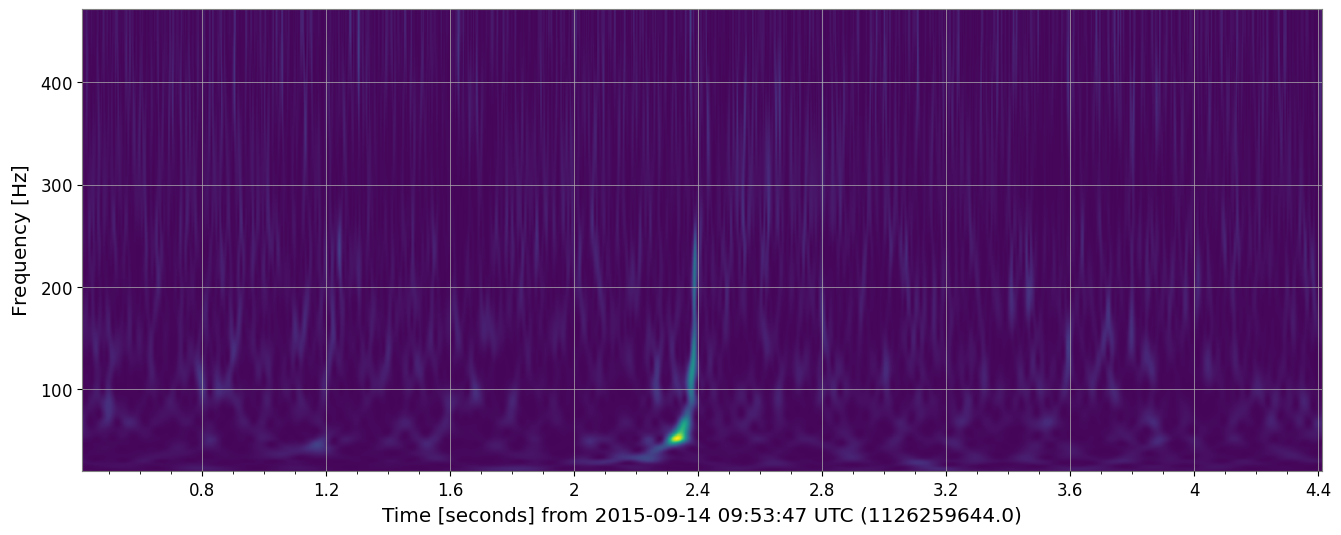

In [62]:
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot
data = TimeSeries(strain_td, t0=times[0], dt=dt)
asd = np.sqrt(ifos[ifo].power_spectral_density.psd_array)
q = data.q_transform(frange=(20,500), fduration=1, tres=0.001, qrange=(2, 16), whiten=asd)
plot = q.plot(figsize=(16, 6))
plot.show()